# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [73]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/ n
    
    return x,y

x_hr,y_hr = ecdf(df['heart_rate'])
x_temp,y_temp = ecdf(df['temperature'])

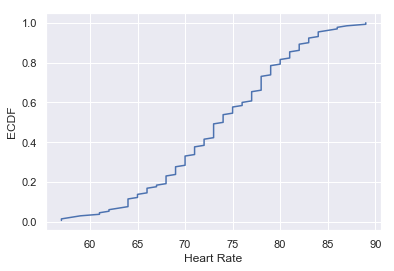

In [74]:
plt.plot(x_hr,y_hr)
plt.xlabel('Heart Rate')
plt.ylabel('ECDF')
plt.show()

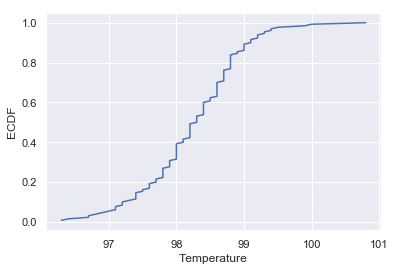

In [75]:
plt.plot(x_temp,y_temp)
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

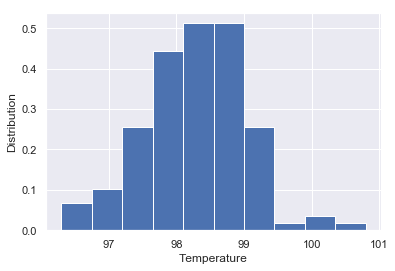

In [76]:
plt.hist(df['temperature'], density=True)
plt.xlabel('Temperature')
plt.ylabel('Distribution')
plt.show()

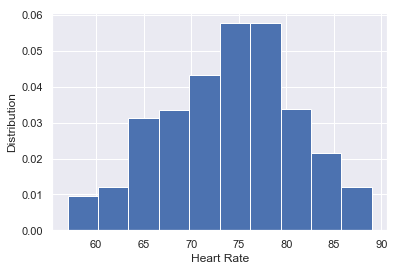

In [77]:
plt.hist(df['heart_rate'], density=True)
plt.xlabel('Heart Rate')
plt.ylabel('Distribution')
plt.show()

### Question 1 - Is the distribution of body temperatures normal? 
    - The temperature distribution looks like a left-skewed distribution. However, since the sample size is larger
    than 30 (size=130) and it is independent, as the sample population is less than 10% of the population, we can assume that this is normally distributed. 

### Question 2 - Is the sample size large? Are the observations independent?
    - Since the size of our distribution is larger than 30, we can say that our sample size is large.
    
    - We can also treat our observations as independent as our sample is less than 10% of the total population. 
    Since the total population of US is around 300 million people, the sample size is less than 0.001% of 
    the total population.

### Question 3 - Is the true population mean really 98.6 degrees F?
 - Null hypothesis - mean is equal to 98.6
 - Alternative hypothesis - mean is different than 98.6
 
 
 - With the sample population provided and with a critical value of 95%, we reject the null hypothesis. Therefore, we reject that the population mean is 98.6 degrees F, as our p-value is - 2.45107850705669e-08 < 0.025.

####   i - First, try a bootstrap hypothesis test.

In [13]:
np.random.seed(42)

In [14]:
def bootstrap_rep(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates with for loop
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data))) 

    return bs_replicates

In [66]:
np.mean(df['temperature'])

98.24923076923078

In [15]:
temp_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6

In [16]:
temp_shifted_rep = bootstrap_rep(temp_shifted, np.mean, 10000)

In [17]:
p = np.sum(temp_shifted_rep <= np.mean(df['temperature']) / len(temp_shifted_rep))
p

0

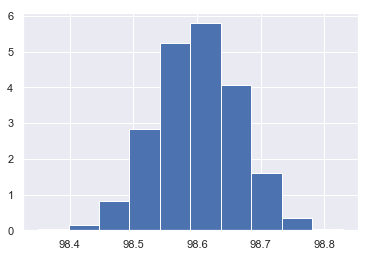

In [18]:
plt.hist(temp_shifted_rep, density=True)
plt.show()

#### ii - Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

- In this case we will use a one-sample test, as we only have one sample data and one parameter to compare, as we do not have the dataset useed by Carl Wunderlich, in which he found the mean to be 98.6..

#### iii - In this situation, is it appropriate to use the  t  or  z  statistic?
- Since our sample size is larger than 30, the most common approach is to take the z-statisc. Even though the standard deviation of the population is unknown, we can replace it witht the sample standard deviation.

- Therefore, in this case, bot results, the t and z distribution, are going to look pretty much the same, allowing us to use either.

- The z-value indicates that the p-value has a really small value. A z-value of -3.6 has a 0.1%, so a z-value of -5.6 has an even smaller chance of happening. 

In [19]:
z_statisc = (np.mean(df['temperature']) - 98.6 )/ (np.std(df['temperature'])/np.sqrt(len(df['temperature'])-1))  
z_statisc_p = sp.norm.cdf(z_statisc)

print("Z-statistic - {}".format(z_statisc))
print("P-value  - {}".format(z_statisc_p))

Z-statistic - -5.454823292364079
P-value  - 2.45107850705669e-08


#### IV - Now try using the other test. How is the result be different? Why?
- Similar to the z-test, the t-test is very small, with a p value of 2.4106320415561276e-07. It shows that the probability for 98.6 to be the mean of the human body temperature is very small.

- If we have a sample size larger than 30, which is our case, the t-distribution and z-distribution will generate pretty much the same results. So no, the results are not different from each other.

- And since we don't know the population standard deviation, the equation for the t and z distribution will be the same.

In [20]:
sp.ttest_1samp(df['temperature'], 98.6) 

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### Question 4 - Draw a small sample of size 10 from the data and repeat both frequentist tests.
- With a sample size of 10, we will fail to reject the null hypothesis with both frequentist tests, if we assume the critical value (alpha) to be 95%.
- The Z-test generated a p-value of 0.15 > 0.025.
- The T-test gerated a p-value of 0.33 > 0.025.

In [30]:
temp_sample = np.random.choice(df['temperature'], size=10)

In [31]:
# Z-test
z_statisc_10 = (np.mean(temp_sample) - 98.6 )/ (np.std(temp_sample)/np.sqrt(len(temp_sample)-1))  

# Z-test p-value
z_pvalue_10 = sp.norm.cdf(z_statisc_10)

print("Z-score - {}".format(z_statisc_10))
print("P-value  - {}".format(z_pvalue_10))

Z-score - -2.348880878058762
P-value  - 0.009414964936097803


In [32]:
# T-test 
t_test_10 = sp.ttest_1samp(temp_sample, 98.6) 
print("T-score - {}".format(t_test_10[0]))
print("P-value  - {}".format(t_test_10[1]))

T-score - -2.348880878058762
P-value  - 0.04338454859611641


#### i - Which one is the correct one to use?
- In this case, with a sample size of 10, the correct approach would be to use the t-statistic.
- T-distribution is used when we dont know the population standard deviation and sample size is less than 30.

#### ii - What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
- The difference between the z and t distribution with a small sample is that the t-distribution  will generate a larger p-value, making it harder to reject a null hypothesis. The reason why a t-distribution has a larger p-value is because it accounts for the increased in variability due to low sample size, thus generating heavier tails when comparing to the z-distribution. 

### Question 5 - At what temperature should we consider someone's temperature to be "abnormal"?
- Given the findings below, an "abnormal" temperature would be below 98.12 degrees F and above 98.37 degrees F, which means any temperature below our 2.5% and above 97.5% confidence interval.


#### i - As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    - Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


##### Parameters
- Confidence Interval - 95% 
- Null hypothesis - Mean is equal to 98.6
- Alternative hypothesis - Mean is different than 98.6

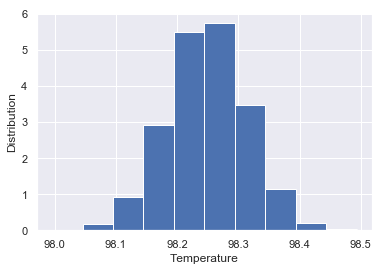

In [24]:
bs_temp = bootstrap_rep(df['temperature'], np.mean, size=10000)

plt.hist(bs_temp, density=True)
plt.xlabel('Temperature')
plt.ylabel('Distribution')
plt.show()

In [25]:
bs_std = np.std(bs_temp)
percentiles = [2.5, 97.5]

conf_interval = np.percentile(bs_temp, percentiles)

print("Bootstrap Standard deviation - {}".format(bs_std))
print("Bootstrap Confidence Interval - {}".format(conf_interval))
print("Margin of Error ~ {}".format(bs_std*1.96))  # MoE = Critival Value * Std Deviation
# Here we are multiplying the std deviation by 1.96 because 1.96 standard deviation gives us
# a p-value of ~97.5% and ~2.5% 


Bootstrap Standard deviation - 0.06405252796303677
Bootstrap Confidence Interval - [98.12307692 98.37461538]
Margin of Error ~ 0.12554295480755207


In [26]:
# Margin of Error test - 
print(np.mean(bs_temp) - (bs_std*1.96))
print(np.mean(bs_temp) + (bs_std*1.96))
print('Confidence Interval (2.5% - 97.5%) - {}'.format(conf_interval))

98.12354558365398
98.37463149326909
Confidence Interval (2.5% - 97.5%) - [98.12307692 98.37461538]


In [27]:
z_bs = (np.mean(bs_temp) - 98.6) / (bs_std) 
z_bs_p = sp.norm.cdf(z_bs)

print('Z-score - {}'.format(z_bs))
print('P-value - {}'.format(z_bs_p))

Z-score - -5.478495114837026
P-value - 2.1447921450217214e-08


- As we are taking many samples means (10'000 samples), we can assume the population std. deviation rather than using the sample standard deviation. Therefore, in our z-test we use "bs_std" rather than the sample std deviation.

- Given our p-value, we will reject the null hypothesis, as 2.0838392871677953e-08 < 0.025.

### Question 6 - Is there a significant difference between males and females in normal temperature?

    - Null hypothesis - Female and Male body temperature are the same
    - Alternative hypothesis - Female body temperature is different than male body temperature
    - Critival Value - 95%


- Assuming a critical value of 95% we can reject the null hypothesis, 0.0111 < 0.25. Therefore, we can assume that there is a significant difference between male and female body temperature, in which female tends to have a higher body temperature than male.

In [49]:
df_gender = df[['temperature', 'gender']]
fem_temp = df_gender[df_gender['gender'] == 'F']
male_temp = df_gender[df_gender['gender'] == 'M']

In [64]:
fem_temp.shape

(65, 2)

In [65]:
male_temp.shape

(65, 2)

In [58]:
print('Male Average Temp - {}'.format(float(np.mean(male_temp))))
print('Female Average Temp - {}'.format(float(np.mean(fem_temp))))

Male Average Temp - 98.1046153846154
Female Average Temp - 98.39384615384613


In [68]:
z_test_diff = (np.mean(male_temp['temperature']) - np.mean(fem_temp['temperature'])) / np.sqrt((np.var(male_temp['temperature'])/(len(male_temp['temperature'])-1)) + (np.var(fem_temp['temperature'])/(len(fem_temp['temperature'])-1))) 

print('Z-score - {}'.format(z_test_diff))
print('P-value - {}'.format(sp.norm.cdf(z_test_diff)))



Z-score - -2.285434538165274
P-value - 0.01114368038033863


In [52]:
sp.ttest_ind(male_temp['temperature'],fem_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

#### i - What testing approach did you use and why?

- I used the z-test. I decided to use this approach because we had a large sample size (n>30) for both samples, each had 65 samples.

#### ii - Write a story with your conclusion in the context of the original problem.

In 1868, Carl Wunderlich measured that mean healthy human body temperature was 98.6 degree F. To test his hypothesis, we collected 130 random samples from healthy people, 65 men and 65 woman, and ran different statistic approaches to compare the the difference of means. 

The mean of our sample population was 98.25 degrees F, which is a large difference from Carl's findings. To understand this large difference, our first test to see how likely a healthy human body would experience a temperature of 98.6 degrees F was bootstrap hypothesis test. In the bootstrap hypothesis test, we generated more than 10'000 random sampling (with replacement) means and there was no sample in the bootstrap with a mean as high as 98.6 degrees F. Thus, with the boostrap findings we have a very strong argument to reject the null hypothesis, which argues that the mean of a normal healthy body temperature is 98.6 degrees F. Nonetheless, to reinforce our findings we ran a z-test to compare the difference of means from our population sample and Carl's mean, and once again, our test showed a very unlikely possibility of having a mean as high as 98.6 degrees F, as it generated a p-value of - 2.45107850705669e-08. 

Therefore, we can strongly conclude that we were wrong for nearly 120 years, and that we reject the null hypothesis of Carl's finding that the mean of a healthy body temperature is 98.6 degrees F. From the findings of our sample, we have a 95% confidence that the true mean of a healthy body temperature lies between 98.12 - 98.37 degrees F.